# <font color = purple> House Price Prediction - Advanced Regression Assignment</font>

Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

Objective:
The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house

Also, determine the optimal value of lambda for ridge and lasso regression.

## General Imports and display settings

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import warnings to suppress warnings in the UI
import warnings
warnings.filterwarnings('ignore')

In [3]:
# As the no. of columns and rows are high, setting the max columns and rows value as below for better readability
pd.set_option("display.max_columns", 100) 
pd.set_option("display.max_rows", 100)

## 1. Data Loading and Understanding

In [4]:
# Importing dataset
df =  pd.read_csv('train.csv')

In [5]:
# view first 5 records of the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# view last 5 records of the dataset
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
# check the shape of the dataframe - no. of rows vs. columns
df.shape

(1460, 81)

In [8]:
# Check the column-wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# check the descriptive statistics of the dataframe
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# check the descriptive statistics of the dataframe - Categorical columns
df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


## 2. Data Cleaning and Preparation

### <font color='blue'>Duplicate check

In [11]:
df.duplicated().sum()

0

#### <font color='green'> There are no duplicate rows in the dataframe

#### Dropping `Id` column as its not useful for further analysis

In [12]:
df.drop('Id', axis=1,inplace=True)

### <font color='blue'>Check Missing values

In [13]:
# Calculate % of missing values for the columns having null values
round((df.isnull().sum()[df.isnull().sum()>0]*100/len(df)).sort_values(ascending=False), 2)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [14]:
(round((df.isnull().sum()[df.isnull().sum()>0]*100/len(df)).sort_values(ascending=False), 2)).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

Out of the above columns with null values, looking at the data definition file provided, we undertsand that few columns have values as 'NA'. Those are treated as NaN in Pandas and are not actual null values. 

**Hence, lets replace the NaN values in such columns with 'None'.**

In [15]:
cols_with_NA = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual']

for col in cols_with_NA:
    df[col].fillna('None', inplace=True)

In [16]:
# Calculate % of missing values for the columns having null values
round((df.isnull().sum()[df.isnull().sum()>0]*100/len(df)).sort_values(ascending=False), 2)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64

`LotFrontage`, `GarageYrBlt`, `MasVnrArea` are numerical variables. Hence, lets impute them with median.

In [17]:
df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)
df.GarageYrBlt.fillna(df.GarageYrBlt.median(), inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.median(), inplace=True)

In [18]:
# Calculate % of missing values for the columns having null values
round((df.isnull().sum()[df.isnull().sum()>0]*100/len(df)).sort_values(ascending=False), 2)

MasVnrType    0.55
Electrical    0.07
dtype: float64

`MasVnrType`,  `Electrical` are categorical variables.

In [19]:
print(df.MasVnrType.value_counts(dropna=False))

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64


Impute `MasVnrType` with None since that's the mode

In [20]:
df.MasVnrType.fillna('None', inplace=True)

In [21]:
df.Electrical.value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

Only a single row is having NaN in `Electrical`. Hence, dropping this row

In [22]:
print(df.shape)
df.dropna(inplace=True)
df.shape

(1460, 80)


(1459, 80)

In [23]:
# Calculate % of missing values for the columns having null values
round((df.isnull().sum()[df.isnull().sum()>0]*100/len(df)).sort_values(ascending=False), 2)

Series([], dtype: float64)

#### <font color='green'> We have handled all the missing values. Hence, there are no more missing values in the data set.

### <font color='blue'>Data imbalance Check

To identify columns having no or very less variance in data, display the columns having presence of a single value > 98%

In [24]:
skewed_cols = []
for column in df.select_dtypes(include ='object'):
    if (df[column].value_counts(normalize=True).mul(100).max()) > 98:
        skewed_cols.append(column)
        print(round(df[column].value_counts(normalize=True)*100, 2))
        print('\n\n..............................................\n\n')

Pave    99.59
Grvl     0.41
Name: Street, dtype: float64


..............................................


AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64


..............................................


Norm      98.97
Feedr      0.41
Artery     0.14
RRNn       0.14
PosN       0.14
RRAn       0.07
RRAe       0.07
PosA       0.07
Name: Condition2, dtype: float64


..............................................


CompShg    98.22
Tar&Grv     0.75
WdShngl     0.41
WdShake     0.34
Roll        0.07
ClyTile     0.07
Metal       0.07
Membran     0.07
Name: RoofMatl, dtype: float64


..............................................


None    99.52
Gd       0.21
Ex       0.14
Fa       0.14
Name: PoolQC, dtype: float64


..............................................




#### Drop these highly skewed columns as single value represents around 99% of data and rest represents only 1%. Hence, there is no variance observed in the data

In [25]:
print(skewed_cols)

df.drop(columns=skewed_cols, inplace=True)
df.shape

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'PoolQC']


(1459, 75)

## 3. Exploratory Data Analysis (EDA)

### <font color='blue'> Univariate Analysis

#### `SalePrice` </font>

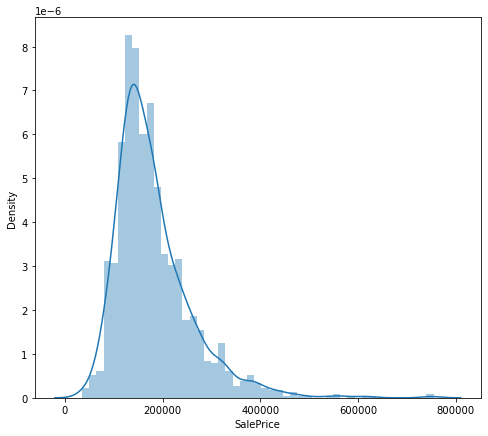

In [26]:
plt.figure(figsize=(8,7))
sns.distplot(df.SalePrice)
plt.show()

In [27]:
print(f'Skewness:',df.SalePrice.skew())
print(f'Kurtosis:',df.SalePrice.kurt())

Skewness: 1.8819429948035529
Kurtosis: 6.529263049673958


Target variable `SalePrice` seems to be right skewed distribution. Most of the houses have average to low Sale price and few houses have the highest Sale price

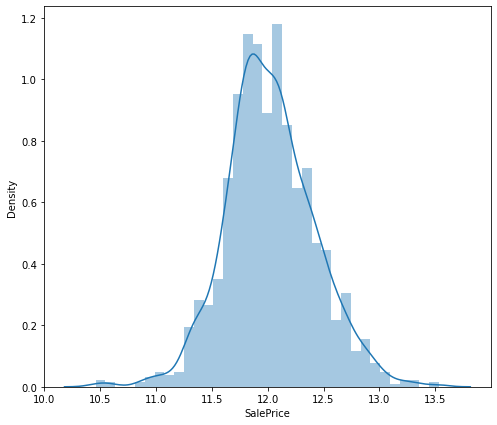

In [28]:
plt.figure(figsize=(8,7))
sns.distplot(np.log(df.SalePrice))
plt.show()

On performing log transformation, `SalePrice` shows normal distribution

#### `OverallCond`

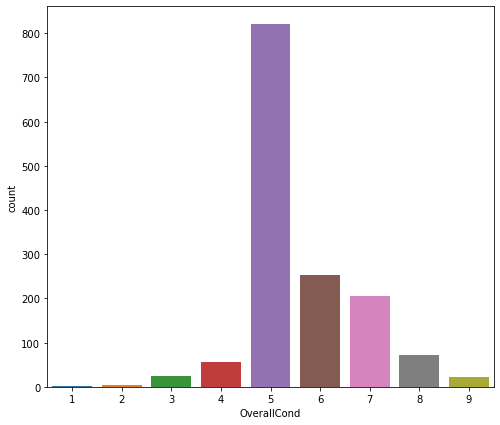

In [29]:
plt.figure(figsize=(8,7))
sns.countplot('OverallCond', data = df)
plt.show()

Overall condition of most of the houses are 5 (Average)

#### `OverallQual`

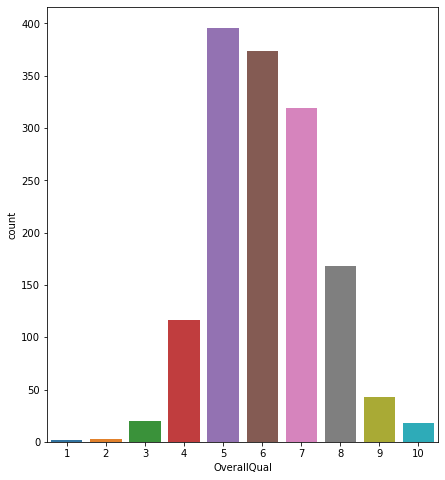

In [30]:
plt.figure(figsize=(7, 8))
sns.countplot('OverallQual', data = df)
plt.show()

Most of the houses fall between the Overall quality rating of Average to Good

#### `FullBath`

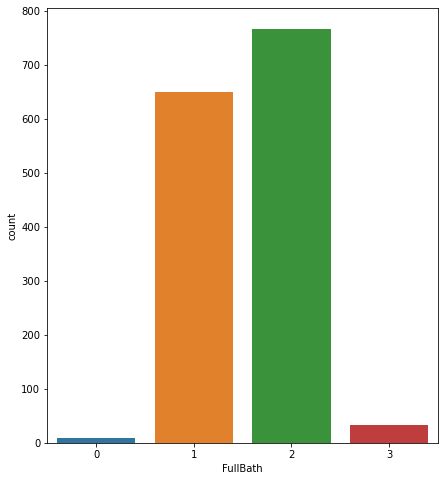

In [31]:
plt.figure(figsize=(7, 8))
sns.countplot('FullBath', data = df)
plt.show()

Most of the houses has 1 or 2 full bath rooms above grade

### <font color='blue'> Bivariate Analysis

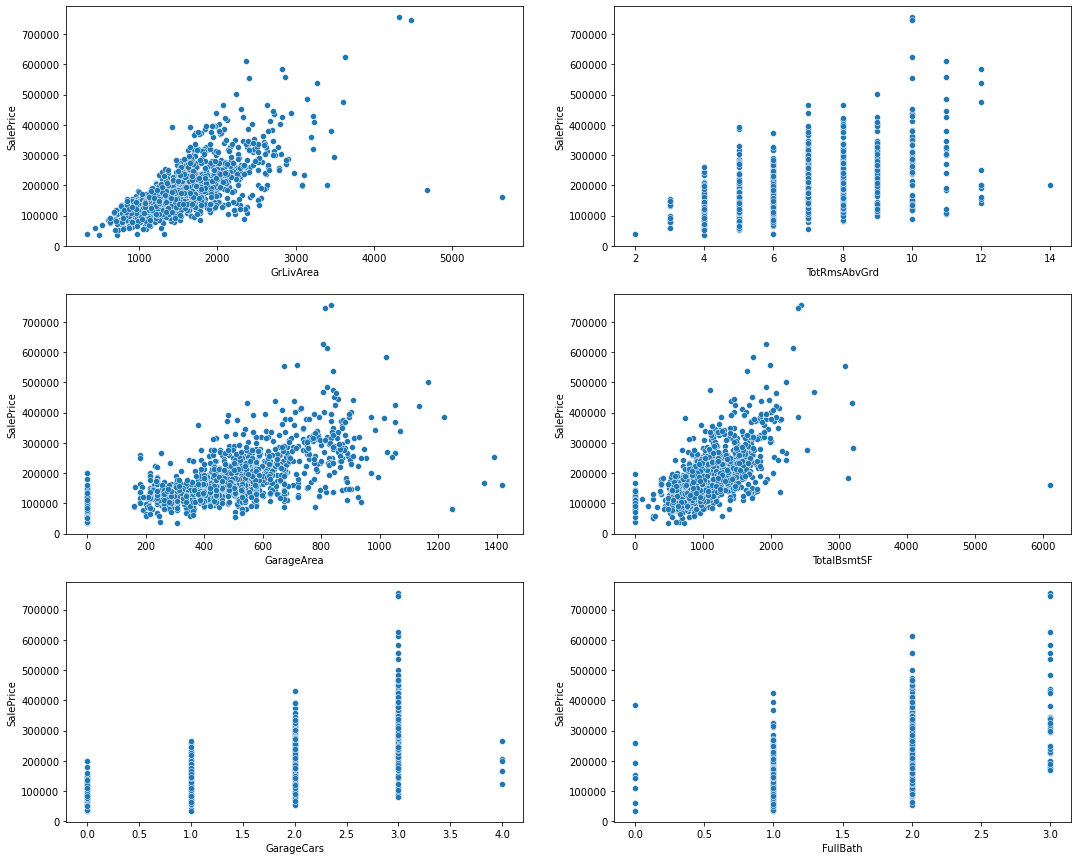

In [32]:
plt.figure(figsize=(18, 15))
plt.subplot(3,2,1)
sns.scatterplot(x= 'GrLivArea', y='SalePrice', data=df)
plt.subplot(3,2,2)
sns.scatterplot(x= 'TotRmsAbvGrd', y='SalePrice', data=df)
plt.subplot(3,2,3)
sns.scatterplot(x= 'GarageArea', y='SalePrice', data=df)
plt.subplot(3,2,4)
sns.scatterplot(x= 'TotalBsmtSF', y='SalePrice', data=df)
plt.subplot(3,2,5)
sns.scatterplot(x= 'GarageCars', y='SalePrice', data=df)
plt.subplot(3,2,6)
sns.scatterplot(x= 'FullBath', y='SalePrice', data=df)

plt.show()

All the above variables seem to be have positive linear relatioship with Sale Price

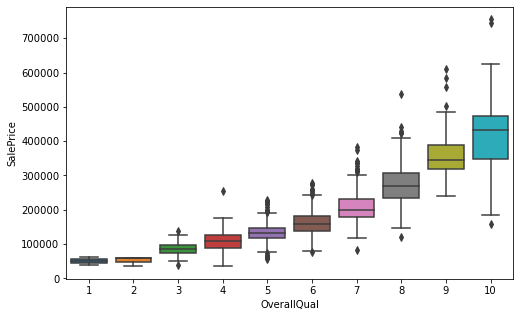

In [33]:
plt.figure(figsize= (8,5))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

As the overall material and finish of the house increases, Sale Price of the house increases.

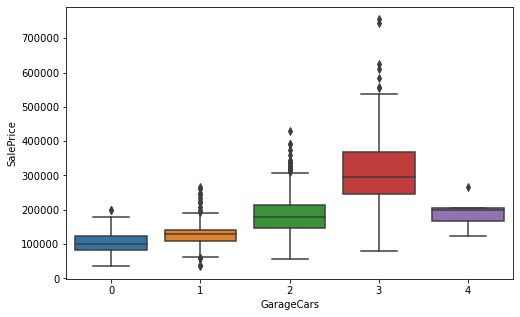

In [34]:
plt.figure(figsize= (8,5))
sns.boxplot(x='GarageCars', y='SalePrice', data=df)
plt.show()

As the size of garage in car capacity increases, Sale Price of the house increases until certain level.

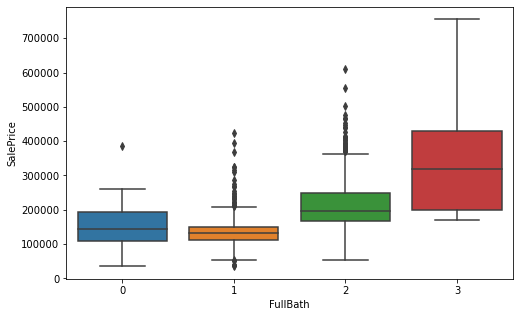

In [35]:
plt.figure(figsize= (8,5))
sns.boxplot(x='FullBath', y='SalePrice', data=df)
plt.show()

As the number of Full bathrooms above grade increases, Sale Price of the house increases.

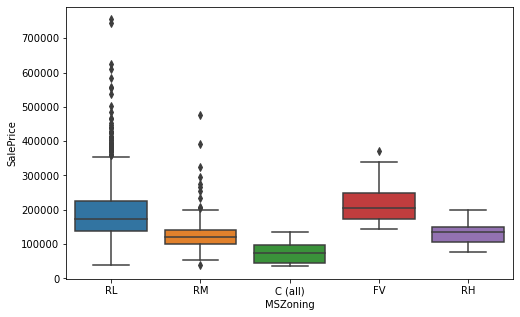

In [36]:
plt.figure(figsize= (8,5))
sns.boxplot(x='MSZoning', y='SalePrice', data=df)
plt.show()

Residential classifications seem to have higher Sale Prices

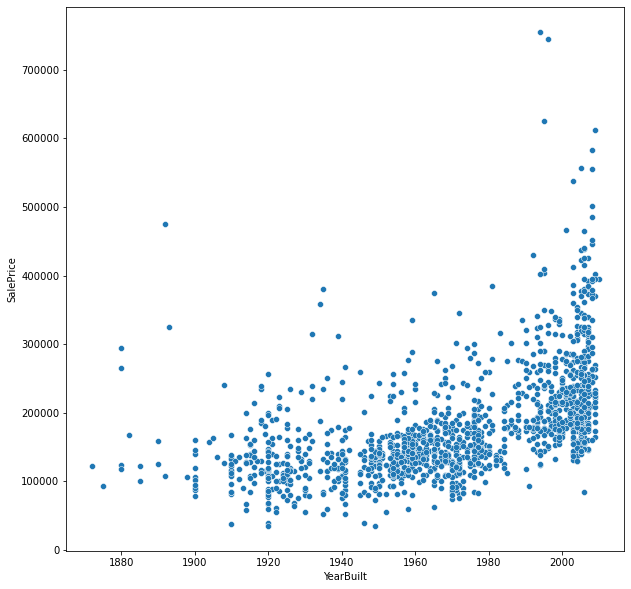

In [37]:
plt.figure(figsize= (10,10))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.show()

When the `YearBuilt` is recent, then the `SalePrice` seems to be higher. And, it is obvious fact that the housing constructed in the recent years attract higher Sale Prices than that of the housing constructed earlier.

### <font color='blue'> Heatmap - Correlation

In [38]:
corr = df.corr()

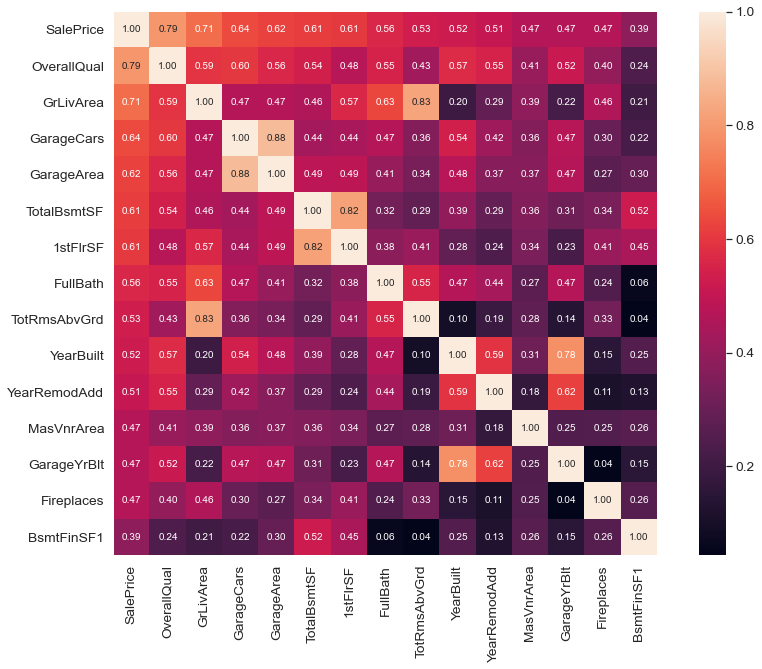

In [39]:
# figure size
plt.figure(figsize=(15,10))
k = 15 # number of variables for a heatmap
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index # identify the nlarget variables to see positive correlation
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values)
plt.show()

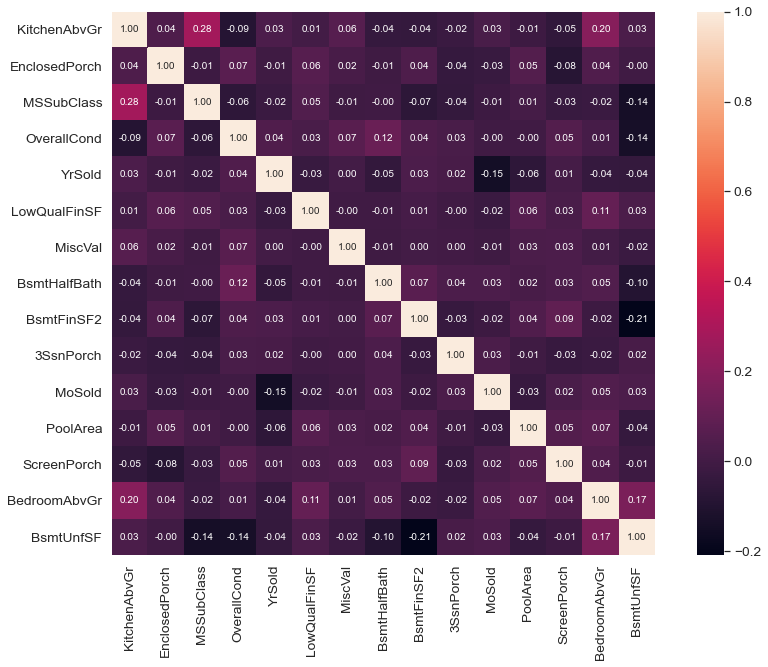

In [40]:
# figure size
plt.figure(figsize=(15,10))
k = 15 # number of variables for a heatmap
cols = corr.nsmallest(k,'SalePrice')['SalePrice'].index # identify the nsmallest variables to see negative correlation
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Observations:

- `GarageCars` and `GarageArea` are highly positive correlated ~ 88%
- `TotRmsAbvGrd` and `GrLivArea` are highly positive correlated ~ 83%
- `TotalBsmtSF` and `1stFlrSF` are highly positive correlated ~ 82%
- `YearBuilt` and `GarageYrBlt` are highly positive correlated ~ 78%

Dropping one out of the above pairs of highly correlated independent variables

In [41]:
df.drop(columns = ['GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'GarageYrBlt'], inplace=True)
df.shape

(1459, 71)

## 4. Data Preprocessing

### <font color=blue> Calculate age from the year

Deriving these new feature variables from year variables make more sense for the analysis.

Drop the original year columns `YrSold`, `GarageYrBlt`, `YearRemodAdd`, `YearBuilt`

In [42]:
import datetime
year = datetime.date.today().year

df['YearBuiltAge'] = year - df.YearBuilt
df['YrSoldAge'] = year - df.YrSold
df['YearRemodAddAge'] = year - df.YearRemodAdd

df.drop(columns=['YrSold', 'YearRemodAdd', 'YearBuilt'], inplace=True)

### <font color=blue> Log Transformation `SalePrice`

In [43]:
df['TransformedPrice'] = np.log(df.SalePrice)

#### Drop `SalePrice` as we had already log transformed it to `TransformedPrice`

In [44]:
df.drop(columns=['SalePrice'], inplace=True)

In [45]:
df.shape

(1459, 71)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1459 non-null   int64  
 1   MSZoning          1459 non-null   object 
 2   LotFrontage       1459 non-null   float64
 3   LotArea           1459 non-null   int64  
 4   Alley             1459 non-null   object 
 5   LotShape          1459 non-null   object 
 6   LandContour       1459 non-null   object 
 7   LotConfig         1459 non-null   object 
 8   LandSlope         1459 non-null   object 
 9   Neighborhood      1459 non-null   object 
 10  Condition1        1459 non-null   object 
 11  BldgType          1459 non-null   object 
 12  HouseStyle        1459 non-null   object 
 13  OverallQual       1459 non-null   int64  
 14  OverallCond       1459 non-null   int64  
 15  RoofStyle         1459 non-null   object 
 16  Exterior1st       1459 non-null   object 


### <font color=blue> Identify Categorical and Numerical variables

In [47]:
df_categorical = df.select_dtypes(exclude=['float64','int64'])
df_categorical.columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [48]:
df_num = df.select_dtypes(exclude=['object'])
df_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YearBuiltAge',
       'YrSoldAge', 'YearRemodAddAge', 'TransformedPrice'],
      dtype='object')

### <font color=blue> Convert Categorical variables to Numbers

#### Mapping

From the data definition file, we see that the below variables contains the ordinal categorical values. Hence, mapping them to numbers accordingly.

In [49]:
df.ExterCond = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df.ExterQual = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

df.GarageQual = df.GarageQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df.GarageFinish = df.GarageFinish.map({'None':0,'Unf':1,'RFn':2,'Fin':3})

df.BsmtQual = df.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df.BsmtCond = df.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

df.FireplaceQu = df.FireplaceQu.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df.KitchenQual = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df.HeatingQC = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

df.LotShape= df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df.Fence = df.Fence.map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })

#### Identify the remaning categorical columns

In [50]:
df_categorical = df.select_dtypes(exclude=['float64','int64'])
df_categorical.columns

Index(['MSZoning', 'Alley', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageCond', 'PavedDrive',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

#### One Hot encoding (OHE)

In [51]:
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,...,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [52]:
df.drop(list(df_categorical.columns), axis=1, inplace=True)
df = pd.concat([df, df_dummies], axis=1)

In [53]:
df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YearBuiltAge,YrSoldAge,YearRemodAddAge,TransformedPrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,...,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,7,5,196.0,3,2,4,3,706,0,150,856,4,854,0,1710,1,0,2,1,3,1,3,0,0,2,548,3,0,61,0,0,0,0,0,0,2,18,13,18,12.247694,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,6,8,0.0,2,2,4,3,978,0,284,1262,4,0,0,1262,0,1,2,0,3,1,2,1,3,2,460,3,298,0,0,0,0,0,0,0,5,45,14,45,12.109011,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,7,5,162.0,3,2,4,3,486,0,434,920,4,866,0,1786,1,0,2,1,3,1,3,1,3,2,608,3,0,42,0,0,0,0,0,0,9,20,13,19,12.317167,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,0,7,5,0.0,2,2,3,4,216,0,540,756,3,756,0,1717,1,0,1,0,3,1,3,1,4,1,642,3,0,35,272,0,0,0,0,0,2,106,15,51,11.849398,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,0,8,5,350.0,3,2,4,3,655,0,490,1145,4,1053,0,2198,1,0,2,1,4,1,3,1,3,2,836,3,192,84,0,0,0,0,0,0,12,21,13,21,12.429216,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [54]:
df.shape

(1459, 206)

### <font color='blue'>Train Test split

In [55]:
from sklearn.model_selection import train_test_split

#### Divide the data into X and y

In [56]:
# Putting feature variable to X
X = df.drop(['TransformedPrice'], axis=1)

# Putting target variable to y
y = df['TransformedPrice']

In [57]:
# Splitting the data into train and test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1021, 205)
(1021,)
(438, 205)
(438,)


### <font color='blue'>Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
num_vars = list(X_train.columns)

In [62]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [63]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

## 5. Model Building and Evaluation

In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [65]:
from sklearn.feature_selection import RFE

In [66]:
from sklearn.metrics import r2_score, mean_squared_error

In [67]:
lreg = LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [68]:
rfe = RFE(lreg, 70)             
rfe = rfe.fit(X_train, y_train)

In [69]:
col = X_train.columns[rfe.support_]
print(col)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'FireplaceQu', 'GarageArea',
       'GarageQual', 'WoodDeckSF', 'PoolArea', 'YearBuiltAge',
       'YearRemodAddAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_RRAn', 'HouseStyle_2Story',
       'RoofStyle_Gable', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior1st_Wd Sdng', 'Exterior2nd_CBlock',
       'Exterior2nd_Other', 'Exterior2nd_Wd Sdn

#### Select only RFE selected columns for X_train and X_test for Ridge and Lasso Regression models

In [70]:
X_train = X_train[col]
X_test = X_test[X_train.columns]

### <font color='blue'> Ridge Regression

In [71]:
# list of alphas to tune

params = {'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [72]:
# Applying Ridge

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002424,0.004849,0.000836,0.001672,0.0001,{'alpha': 0.0001},-0.084450,-0.089852,-0.097212,-0.084233,-0.080499,-0.087249,0.005806,24,-0.080434,-0.080172,-0.074995,-0.073461,-0.081538,-0.078120,0.003247
1,0.011830,0.007153,0.002677,0.003407,0.001,{'alpha': 0.001},-0.084449,-0.089852,-0.097212,-0.084232,-0.080499,-0.087249,0.005806,23,-0.080434,-0.080172,-0.074995,-0.073461,-0.081538,-0.078120,0.003247
2,0.002160,0.003840,0.009373,0.007653,0.01,{'alpha': 0.01},-0.084447,-0.089850,-0.097216,-0.084229,-0.080499,-0.087248,0.005807,22,-0.080433,-0.080172,-0.074994,-0.073461,-0.081537,-0.078119,0.003247
3,0.009372,0.007653,0.003125,0.006249,0.05,{'alpha': 0.05},-0.084436,-0.089841,-0.097232,-0.084213,-0.080500,-0.087244,0.005815,21,-0.080429,-0.080169,-0.074990,-0.073460,-0.081534,-0.078116,0.003247
4,0.003124,0.006248,0.012497,0.006249,0.1,{'alpha': 0.1},-0.084422,-0.089831,-0.097252,-0.084194,-0.080501,-0.087240,0.005824,20,-0.080423,-0.080167,-0.074985,-0.073459,-0.081530,-0.078113,0.003246


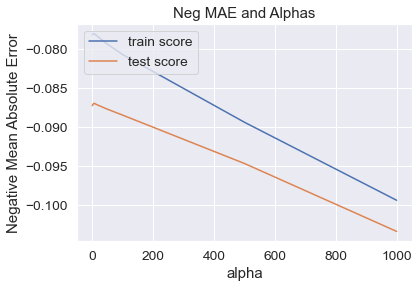

In [74]:
# plot mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.legend(['train score','test score'], loc='upper left')
plt.show()

In [75]:
model_cv.best_params_

{'alpha': 7.0}

In [76]:
ridge_alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=ridge_alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=7.0)

In [77]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
ridge_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
ridge_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
ridge_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
ridge_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
ridge_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
ridge_metric.append(mse_test_lr**0.5)

0.9167921009186977
0.8588959700965474
13.879166507314427
9.302024415493822
0.013593698831845668
0.021237498665511008


In [78]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient': ridge.coef_})
ridge_df.sort_values('Coefficient', ascending=False).head(15)

,Features,Coefficient
26,MSZoning_RL,0.141491
11,GrLivArea,0.120731
27,MSZoning_RM,0.110678
3,OverallQual,0.068624
24,MSZoning_FV,0.068074
4,OverallCond,0.040339
18,GarageArea,0.039785
25,MSZoning_RH,0.038256
37,Neighborhood_NridgHt,0.031981
19,GarageQual,0.031658


### <font color='blue'> Lasso Regression

In [79]:
# list of alphas to tune

params = {'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [80]:
# Applying lasso

lasso = Lasso()
# Cross validation
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
cv_results = pd.DataFrame(model_cv.cv_results_)

In [82]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026089,0.004920,0.001584,0.003168,0.0001,{'alpha': 0.0001},-0.084075,-0.089614,-0.097478,-0.083992,-0.080292,-0.087090,0.005986,2,-0.080246,-0.080015,-0.074811,-0.073361,-0.081364,-0.077960,0.003228
1,0.014149,0.006355,0.014782,0.002303,0.001,{'alpha': 0.001},-0.081646,-0.089429,-0.100009,-0.082336,-0.080347,-0.086754,0.007342,1,-0.079536,-0.079681,-0.074948,-0.073408,-0.081321,-0.077778,0.003045
2,0.008065,0.007283,0.007880,0.009824,0.01,{'alpha': 0.01},-0.090431,-0.096511,-0.101960,-0.087942,-0.091256,-0.093620,0.005018,3,-0.090703,-0.088429,-0.083798,-0.082154,-0.089905,-0.086998,0.003404
3,0.006721,0.008232,0.006465,0.007923,0.05,{'alpha': 0.05},-0.127571,-0.137271,-0.134567,-0.115143,-0.125578,-0.128026,0.007752,4,-0.129858,-0.127125,-0.123025,-0.118404,-0.128717,-0.125426,0.004206
4,0.008446,0.007108,0.003125,0.006251,0.1,{'alpha': 0.1},-0.168481,-0.173701,-0.172181,-0.148514,-0.160806,-0.164737,0.009257,5,-0.166581,-0.163957,-0.161720,-0.156290,-0.167127,-0.163135,0.003933


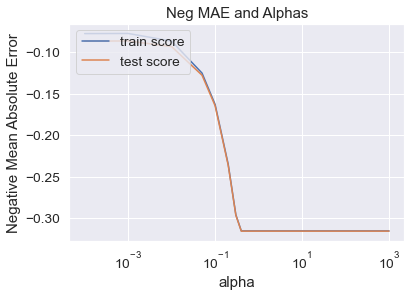

In [83]:
# plot mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.legend(['train score','test score'], loc='upper left')
plt.show()

In [84]:
model_cv.best_params_

{'alpha': 0.001}

In [85]:
lasso_alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=lasso_alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [86]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
lasso_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
lasso_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
lasso_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
lasso_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
lasso_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
lasso_metric.append(mse_test_lr**0.5)

0.9151126737390389
0.8599777934521644
14.159296756013763
9.230707194617235
0.013868067341835223
0.02107467396031332


In [87]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient': lasso.coef_})
lasso_df.sort_values('Coefficient', ascending=False).head(15)

,Features,Coefficient
11,GrLivArea,0.122114
26,MSZoning_RL,0.119615
27,MSZoning_RM,0.086713
3,OverallQual,0.071052
24,MSZoning_FV,0.056710
4,OverallCond,0.041043
18,GarageArea,0.037923
5,BsmtQual,0.031526
25,MSZoning_RH,0.031276
37,Neighborhood_NridgHt,0.029823


In [88]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'])

rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.916792,0.915113
1,R2 Score (Test),0.858896,0.859978
2,RSS (Train),13.879167,14.159297
3,RSS (Test),9.302024,9.230707
4,MSE (Train),0.116592,0.117763
5,MSE (Test),0.145731,0.145171


## 6. Final model evaluation

Both Ridge and Lasso Regression models have almost similar R2_score values ~ 86% for test data.

#### <font color='green'> However, Lasso Regression is considered over Ridge Regression as Final model since since Lasso regression helps by performing feature selection

#### Which variables are significant in predicting the price of a house?

In [89]:
top_10 = lasso_df.sort_values('Coefficient', ascending=False).reset_index().head(10)

Below are the top 10 feature variables significant in predicting the price of a house.

In [90]:
top_10.Features

0               GrLivArea
1             MSZoning_RL
2             MSZoning_RM
3             OverallQual
4             MSZoning_FV
5             OverallCond
6              GarageArea
7                BsmtQual
8             MSZoning_RH
9    Neighborhood_NridgHt
Name: Features, dtype: object

#### How well those variables describe the price of a house?

In [91]:
top_10

,index,Features,Coefficient
0,11,GrLivArea,0.122114
1,26,MSZoning_RL,0.119615
2,27,MSZoning_RM,0.086713
3,3,OverallQual,0.071052
4,24,MSZoning_FV,0.056710
5,4,OverallCond,0.041043
6,18,GarageArea,0.037923
7,5,BsmtQual,0.031526
8,25,MSZoning_RH,0.031276
9,37,Neighborhood_NridgHt,0.029823


## Subjective Questions

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

##### Optimal value of alpha for ridge and lasso regression

In [92]:
print(f'Ridge:',ridge_alpha)
print(f'Lasso:',lasso_alpha)

Ridge: 7.0
Lasso: 0.001


##### Double the alpha values for both ridge and lasso

In [93]:
alpha = ridge_alpha*2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=14.0)

In [94]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print('Ridge_train_score:',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Ridge_test_score:', r2_test_lr)

Ridge_train_score: 0.9157597425675179
Ridge_test_score: 0.859745217706103


In [95]:
alpha = lasso_alpha*2
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [96]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print('Lasso_train_score:',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Lasso_test_score:', r2_test_lr)

Lasso_train_score: 0.90959028138821
Lasso_test_score: 0.858079414210642


##### Most important predictor variables after the change is implemented

In [97]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient': ridge.coef_})
ridge_df.sort_values('Coefficient', ascending=False).head()

,Features,Coefficient
11,GrLivArea,0.115617
26,MSZoning_RL,0.112167
27,MSZoning_RM,0.084486
3,OverallQual,0.069402
24,MSZoning_FV,0.052552


In [98]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient': lasso.coef_})
lasso_df.sort_values('Coefficient', ascending=False).head()

,Features,Coefficient
11,GrLivArea,0.118059
3,OverallQual,0.075426
26,MSZoning_RL,0.048757
4,OverallCond,0.041605
18,GarageArea,0.035747


### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [99]:
df_new = df.copy()
df_new.drop(columns =['GrLivArea','MSZoning_RL','MSZoning_RM','OverallQual','MSZoning_FV'], inplace=True)
df_new.shape

(1459, 201)

In [100]:
df.shape

(1459, 206)

In [101]:
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size =0.7, test_size=0.3, random_state=100)

In [102]:
print(df_train.shape)
df_test.shape

(1021, 201)


(438, 201)

In [103]:
y_train = df_train.pop('TransformedPrice')
X_train = df_train

In [104]:
y_test = df_test.pop('TransformedPrice')
X_test = df_test

In [105]:
num_vars = X_train.select_dtypes(exclude='object').columns
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [106]:
lreg = LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [107]:
rfe = RFE(lreg, 70)             
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]

In [108]:
X_train = X_train[col]
X_test = X_test[X_train.columns]

In [109]:
# list of alphas to tune

params = {'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

#### Lasso

In [110]:
# Applying lasso

lasso = Lasso()
# Cross validation
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
cv_results = pd.DataFrame(model_cv.cv_results_)

In [112]:
model_cv.best_params_

{'alpha': 0.0001}

In [113]:
lasso_alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=lasso_alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [114]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
lasso_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
lasso_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
lasso_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
lasso_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
lasso_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
lasso_metric.append(mse_test_lr**0.5)

0.8961600753016198
0.8242950925583424
17.320610433723438
11.58302381627719
0.016964358896888774
0.026445259854514135


In [115]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient': lasso.coef_})
lasso_df.sort_values('Coefficient', ascending=False).head()

,Features,Coefficient
10,2ndFlrSF,0.107029
57,BsmtExposure_None,0.086516
8,TotalBsmtSF,0.074146
19,GarageArea,0.048560
3,BsmtQual,0.046335
